In [1]:
import os
import shutil
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from create_training_data_lib import random_mixture_sample


In [2]:
# generate dataset

data_path = '../simulated_2d/'

n_dimensions = 2 # number of dimensions
n_components = [1, 2] # possible number of pathological components
sample_sizes = [250, 10000]  # possible no. samples

n_samples = 15000

data = [] # list of vectors containing mixture samples
sizes = []
components = []
mean_vecs = []
std_devs = []
corr_mats = []
for i in range(n_samples):
    
    if i%500==0:
        print(i)

    sample, mean_vectors, stds, corr_matrices, comps, sz = random_mixture_sample(
        n_dimensions = n_dimensions, 
        n_components = np.random.choice(n_components),
        n_samples = np.random.uniform(sample_sizes[0], sample_sizes[1]),
        quantize_step = np.random.choice([0, 0.05, 0.1, 0.2]),
    )
    
    data.append(sample)
    mean_vecs.append(mean_vectors)
    std_devs.append(stds)
    corr_mats.append(corr_matrices)
    components.append(comps)
    sizes.append(sz)
    
    

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500


In [3]:
# standardize samples, so model can be scale independent
data_scaled = []
targets = []
for c,i in enumerate(data):
    
    if c%500==0:
        print(c)

    # record scaled data points
    data_scaled.append((i-i.mean(axis=0))/i.std(axis=0))
    
    # transform target statistics
    a = 1/i.std(axis=0) # reciprocal of sample std for scaling
    b = -i.mean(axis=0) # negative of sample mean for shifting
    transformed_mean = a*(mean_vecs[c][0]+b) # transform mean
    transformed_std = a*std_devs[c][0]
    
    # create NN target from standardized sample
    targets.append(np.hstack([
        transformed_mean, 
        transformed_std,
        corr_mats[c][0][0,1]
    ]))
    

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500


In [4]:
# split
idx_train, idx_test = train_test_split(range(len(data)), test_size=(2000/len(data)), random_state=10)
assert len(set(idx_train).intersection(idx_test))==0, 'Error: train/test overlap'
idx_val, idx_test = train_test_split(idx_test, test_size=0.5, random_state=10)
assert len(set(idx_val).intersection(idx_test))==0, 'Error: val/test overlap'

print(len(idx_train))
print(len(idx_val))
print(len(idx_test))


13000
1000
1000


In [5]:
# save generated data
if not os.path.exists(data_path):
    os.makedirs(data_path)
    os.makedirs(data_path+'/train/')
    os.makedirs(data_path+'/val/')
    os.makedirs(data_path+'/test/')
else:
    shutil.rmtree(data_path)
    os.makedirs(data_path)
    os.makedirs(data_path+'/train/')
    os.makedirs(data_path+'/val/')
    os.makedirs(data_path+'/test/')

with open(data_path+'/train/input_data.pkl', 'wb') as handle:
    pickle.dump([data_scaled[i] for i in idx_train], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/train/original_data.pkl', 'wb') as handle:
    pickle.dump([data[i] for i in idx_train], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/train/target_data.pkl', 'wb') as handle:
    pickle.dump([targets[i] for i in idx_train], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/train/means.pkl', 'wb') as handle:
    pickle.dump([mean_vecs[i] for i in idx_train], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/train/stds.pkl', 'wb') as handle:
    pickle.dump([std_devs[i] for i in idx_train], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/train/corr_mats.pkl', 'wb') as handle:
    pickle.dump([corr_mats[i] for i in idx_train], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/train/sizes.pkl', 'wb') as handle:
    pickle.dump([sizes[i] for i in idx_train], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/train/components.pkl', 'wb') as handle:
    pickle.dump([components[i] for i in idx_train], handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(data_path+'/val/input_data.pkl', 'wb') as handle:
    pickle.dump([data_scaled[i] for i in idx_val], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/val/original_data.pkl', 'wb') as handle:
    pickle.dump([data[i] for i in idx_val], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/val/target_data.pkl', 'wb') as handle:
    pickle.dump([targets[i] for i in idx_val], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/val/means.pkl', 'wb') as handle:
    pickle.dump([mean_vecs[i] for i in idx_val], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/val/stds.pkl', 'wb') as handle:
    pickle.dump([std_devs[i] for i in idx_val], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/val/corr_mats.pkl', 'wb') as handle:
    pickle.dump([corr_mats[i] for i in idx_val], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/val/sizes.pkl', 'wb') as handle:
    pickle.dump([sizes[i] for i in idx_val], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/val/components.pkl', 'wb') as handle:
    pickle.dump([components[i] for i in idx_val], handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(data_path+'/test/input_data.pkl', 'wb') as handle:
    pickle.dump([data_scaled[i] for i in idx_test], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/test/original_data.pkl', 'wb') as handle:
    pickle.dump([data[i] for i in idx_test], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/test/target_data.pkl', 'wb') as handle:
    pickle.dump([targets[i] for i in idx_test], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/test/means.pkl', 'wb') as handle:
    pickle.dump([mean_vecs[i] for i in idx_test], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/test/stds.pkl', 'wb') as handle:
    pickle.dump([std_devs[i] for i in idx_test], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/test/corr_mats.pkl', 'wb') as handle:
    pickle.dump([corr_mats[i] for i in idx_test], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/test/sizes.pkl', 'wb') as handle:
    pickle.dump([sizes[i] for i in idx_test], handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path+'/test/components.pkl', 'wb') as handle:
    pickle.dump([components[i] for i in idx_test], handle, protocol=pickle.HIGHEST_PROTOCOL)


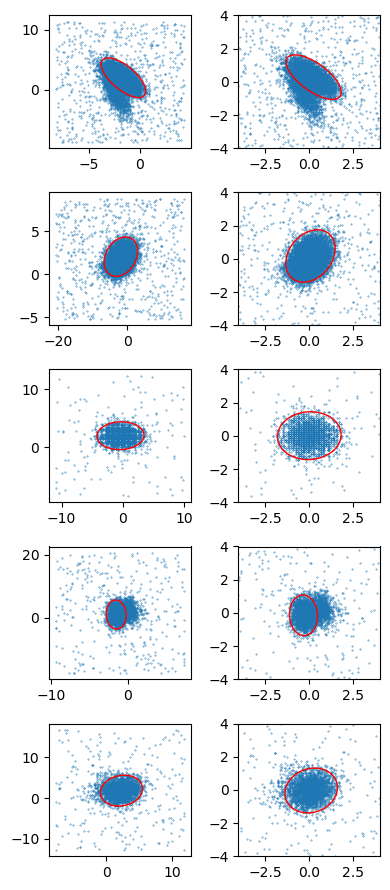

In [6]:
# checking transformation:

# does a sample using standardized target parameters match the reference Gaussian?

import matplotlib.pyplot as plt
os.sys.path.append('../../evaluation/')
from metrics import correlation_to_covariance, plot_cov_ellipse

plt.figure(figsize=(4, 9))
for i in range(5):
    
    idx = np.random.choice(len(data)) # select random sample index
    
    cov_mat = correlation_to_covariance(corr_mats[idx][0], std_devs[idx][0])
    
    # plot unscaled data with 95% ellipse
    plt.subplot(5,2,(i*2)+1)
    plt.scatter(data[idx][:,0], data[idx][:,1], s=0.1)
    ellipse = plot_cov_ellipse(mean_vecs[idx][0], cov_mat, fc='none', color='r')
    plt.gca().add_patch(ellipse)
    
    cov_mat = correlation_to_covariance(corr_mats[idx][0], targets[idx][2:4])
    
    # plot scaled sample with 95% ellipse
    plt.subplot(5,2,(i*2)+2)
    plt.scatter(data_scaled[idx][:,0], data_scaled[idx][:,1], s=0.1)
    ellipse = plot_cov_ellipse(targets[idx][:2], cov_mat, fc='none', color='r')
    plt.gca().add_patch(ellipse)
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])

plt.gcf().tight_layout()


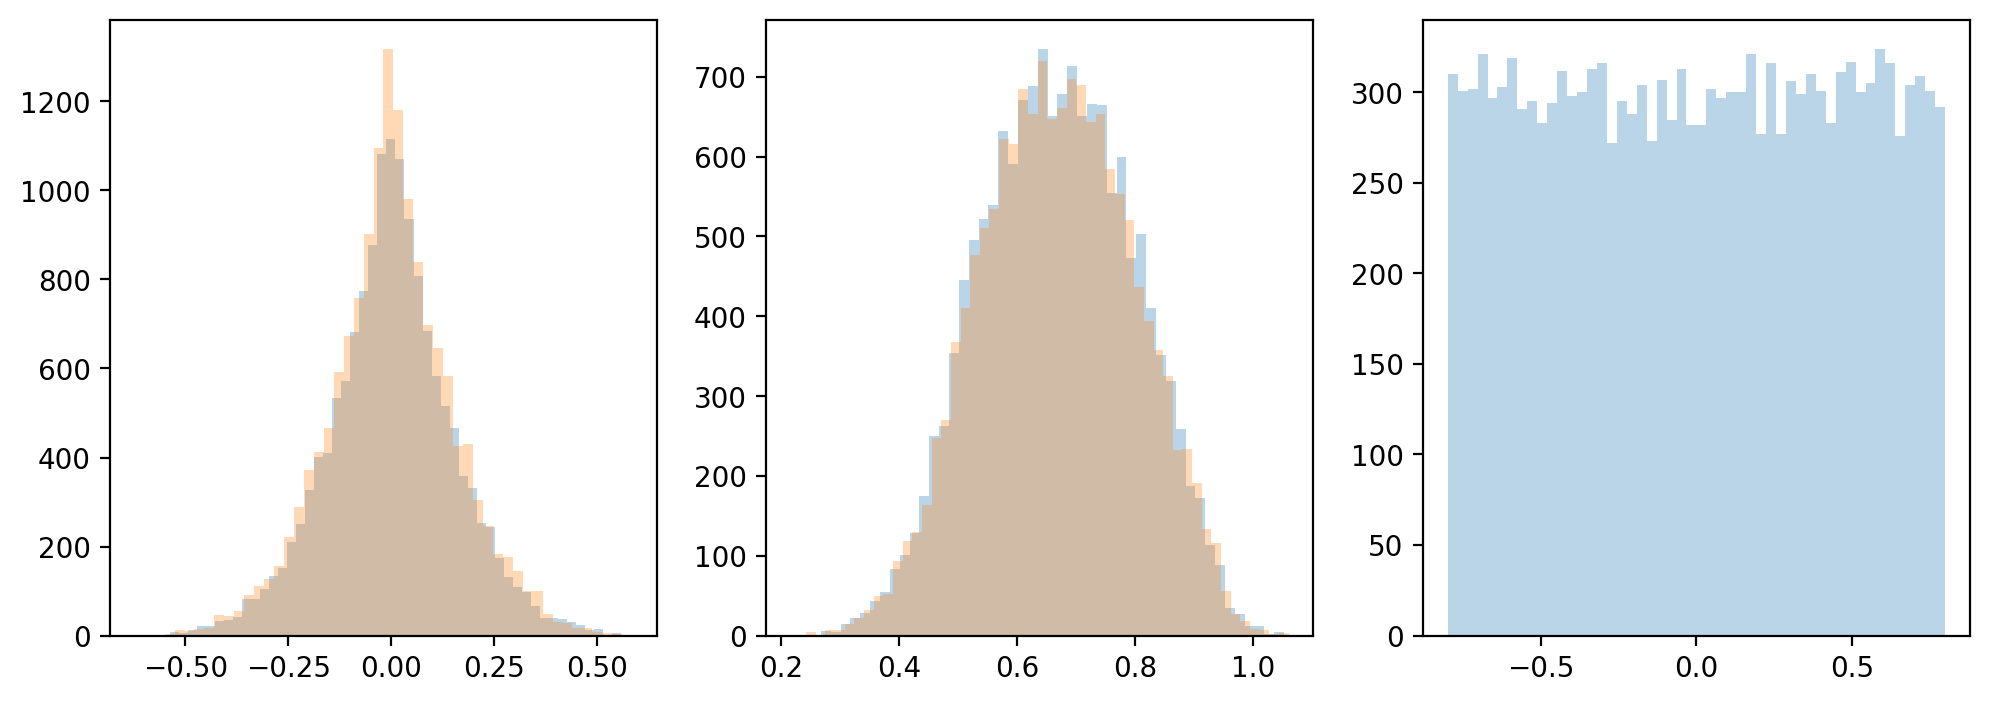

In [7]:
plt.figure(figsize=(12, 4), dpi=200)
plt.subplot(1,3,1)
plt.hist([i[0] for i in targets], 50, alpha=0.3);
plt.hist([i[1] for i in targets], 50, alpha=0.3);
plt.subplot(1,3,2)
plt.hist([i[2] for i in targets], 50, alpha=0.3);
plt.hist([i[3] for i in targets], 50, alpha=0.3);
plt.subplot(1,3,3)
plt.hist([i[4] for i in targets], 50, alpha=0.3);
